In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

toliary mg
billings us
busselton au
rikitea pf
asayita et
port alfred za
thompson ca
ushuaia ar
lebu cl
airai pw
georgetown sh
bredasdorp za
ribeira grande pt
hilo us
vaini to
banda aceh id
butaritari ki
sisimiut gl
hithadhoo mv
rikitea pf
karamay cn
livramento br
norman wells ca
lianyuan cn
bahia blanca ar
longyearbyen sj
portland au
hermanus za
rawson ar
isangel vu
ketchikan us
karoi zw
walvis bay na
salinopolis br
mataura pf
saint-philippe re
waddan ly
illoqqortoormiut gl
cape town za
jamestown sh
khatanga ru
tall kayf iq
lata sb
mahebourg mu
pevek ru
aklavik ca
atuona pf
sivac rs
raymond ca
hobart au
albany au
ternate id
yuzhno-yeniseyskiy ru
rikitea pf
burnie au
chulumani bo
dingle ie
rikitea pf
port-gentil ga
sentyabrskiy ru
brigantine us
mahebourg mu
barentsburg sj
pevek ru
port alfred za
puerto ayora ec
torbay ca
owando cg
hermanus za
mataura pf
barrow us
saint-philippe re
vestmannaeyjar is
busselton au
puerto ayora ec
nizhneyansk ru
barrow us
atuona pf
carutapera br
yomitan jp

saint-georges gf
khatanga ru
bani do
iranshahr ir
sao filipe cv
busselton au
tuktoyaktuk ca
barentsburg sj
mataura pf
vaini to
curumani co
lebu cl
hilo us
san patricio mx
bluff nz
saint-philippe re
macae br
ust-koksa ru
galbshtadt ru
rikitea pf
te anau nz
port alfred za
northam au
qaanaaq gl
dikson ru
dubbo au
faanui pf
paucartambo pe
george za
carutapera br
jamestown sh
chuy uy
portobelo pa
pandan ph
muzhi ru
chimbote pe
jalu ly
morondava mg
cherskiy ru
port elizabeth za
ushuaia ar
skovorodino ru
vardo no
deer lake ca
lompoc us
buhe cn
udachnyy ru
avarua ck
qaanaaq gl
malanje ao
mataura pf
illoqqortoormiut gl
dingle ie
cape town za
tura ru
atuona pf
sitka us
kodiak us
jamestown sh
vestmannaeyjar is
hilo us
manpur in
isangel vu
pio ix br
albemarle us
rikitea pf
port alfred za
rikitea pf
kushima jp
east london za
ribeira grande pt
beloha mg
albany au
omboue ga
buraydah sa
vetluzhskiy ru
kapaa us
kahului us
dali cn
roma au
rikitea pf
lagoa pt
kapaa us
sitka us
poum nc
terrace bay ca
riki

ushuaia ar
maraba br
ushuaia ar
moose factory ca
pyshma ru
andra ru
mega et
mataura pf
fare pf
albany au
lorengau pg
nikolskoye ru
hilo us
merauke id
bredasdorp za
cape town za
yellowknife ca
lebu cl
tiksi ru
raga sd
kaitangata nz
iqaluit ca
souillac mu
lasa cn
bengkulu id
charleston us
sinnamary gf
tilichiki ru
ocean springs us
carauari br
houma us
clyde river ca
mocambique mz
husavik is
port macquarie au
walvis bay na
ushuaia ar
kazalinsk kz
zyuzelskiy ru
atuona pf
kavieng pg
mys shmidta ru
miles city us
saint john ca
puerto ayora ec
fort nelson ca
biak id
coihaique cl
rikitea pf
tuktoyaktuk ca
attawapiskat ca
mys shmidta ru
vakhtan ru
port elizabeth za
bumba cd
port-gentil ga
provideniya ru
rikitea pf
ondangwa na
calabozo ve
paramaribo sr
upernavik gl
sergeyevka kz
rawson ar
kologriv ru
arraial do cabo br
hobart au
hilo us
ngukurr au
port alfred za
ilulissat gl
gat ly
shumskiy ru
rikitea pf
port elizabeth za
thompson ca
atuona pf
praia cv
east london za
talnakh ru
vestbygda no
dikso

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | toliary
City not found. Skipping...
Processing Record 2 of Set 1 | billings
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | asayita
City not found. Skipping...
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | banda aceh
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | karamay
City not found. Skipping...
Processing Record 21 of Set 1 | livramento
Pr

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
#Inserting new column order
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [ ]:
#Inputting new column order to data frame 
city_data_df=city_data_df[new_column_order]
city_data_df

In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
import time

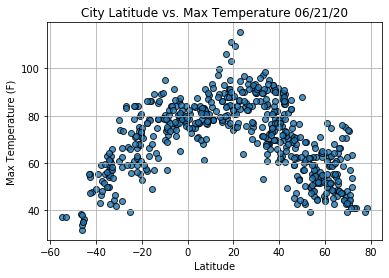

In [56]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

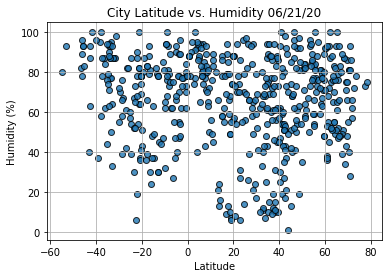

In [57]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

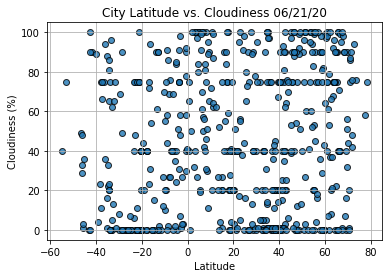

In [58]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

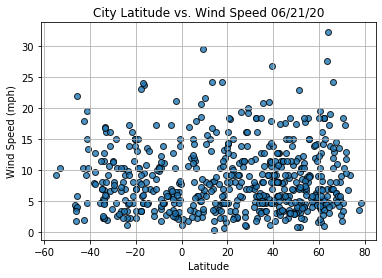

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
#Finding the correlation between latitude and maximum temperature
#import dependency
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
#creating a pivot table using loc method to obtain everything at index 13 of the dataframe
index13=city_data_df.loc[13]
index13

City                  New Norfolk
Country                        AU
Date          2020-06-21 17:56:45
Lat                        -42.78
Lng                        147.06
Max Temp                       54
Humidity                       93
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [32]:
#creating a new data frame to gather data that meets criteria for northern hemisphere
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Usinsk,RU,2020-06-21 17:56:41,65.99,57.53,45.27,65,69,11.92
1,Abdulino,RU,2020-06-21 17:56:41,53.70,53.67,50.43,80,35,11.07
2,Hilo,US,2020-06-21 17:56:42,19.73,-155.09,73.99,56,40,8.05
3,Ostrovnoy,RU,2020-06-21 17:56:42,68.05,39.51,58.80,51,98,11.01
4,Avera,US,2020-06-21 17:52:42,33.19,-82.53,91.40,43,40,5.82
...,...,...,...,...,...,...,...,...,...
583,San Policarpo,PH,2020-06-21 17:59:43,12.18,125.51,82.33,81,16,7.74
584,Katangli,RU,2020-06-21 17:59:43,51.71,143.23,40.55,93,96,7.23
585,Del Rio,US,2020-06-21 17:59:43,29.36,-100.90,91.40,55,20,6.93
586,Turbat,PK,2020-06-21 17:59:44,26.00,63.04,82.67,81,7,8.12


In [23]:
#creating a new data frame to gather data that meets criteria for southern hemisphere
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Codrington,AU,2020-06-21 17:56:43,-38.27,141.97,43.12,95,23,7.90
6,Cape Town,ZA,2020-06-21 17:54:01,-33.93,18.42,61.00,93,75,4.70
7,Waingapu,ID,2020-06-21 17:56:43,-9.66,120.26,75.47,83,98,10.45
8,Avarua,CK,2020-06-21 17:56:44,-21.21,-159.78,73.40,64,100,8.05
9,Coquimbo,CL,2020-06-21 17:56:44,-29.95,-71.34,60.80,72,8,11.41
...,...,...,...,...,...,...,...,...,...
566,Broken Hill,AU,2020-06-21 17:59:36,-31.95,141.43,46.40,87,75,9.17
571,Walvis Bay,NA,2020-06-21 17:59:38,-22.96,14.51,68.00,52,48,9.17
574,Maceio,BR,2020-06-21 17:56:10,-9.67,-35.74,82.40,58,20,10.29
576,Santa Maria,BR,2020-06-21 17:59:40,-29.68,-53.81,74.03,70,69,7.54


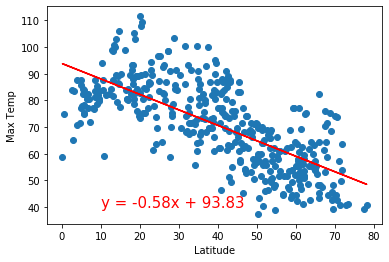

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

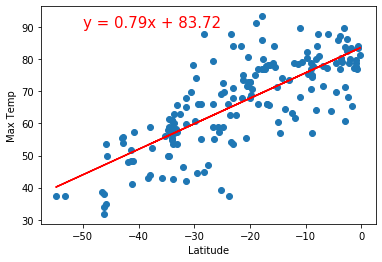

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

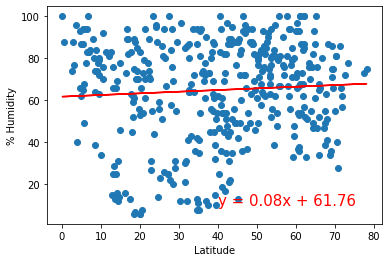

In [26]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

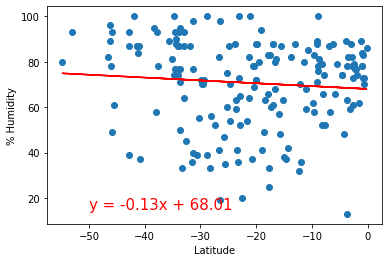

In [27]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

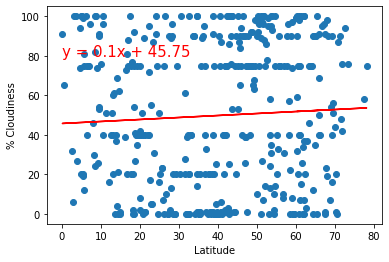

In [40]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,80))

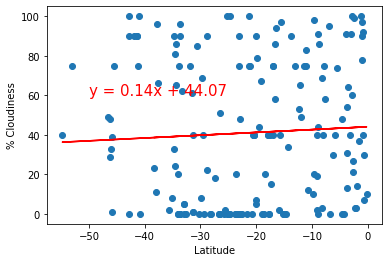

In [29]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

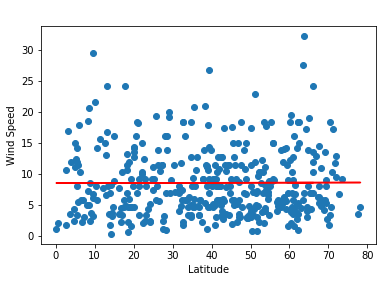

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

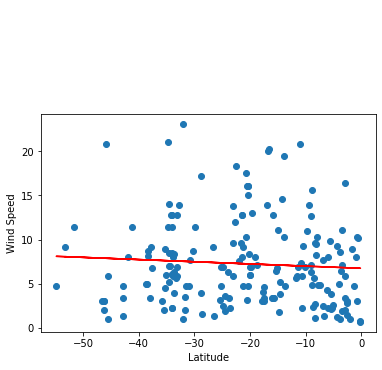

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))